# <center> Applied Statistics for Data Science 
<center> Humberto Díaz </br>
The University of Winnipeg </br>
DIT 54105 AIW01: Applied Statistics for Data Science </br>
Hieu Dang PhD. </br>
May 19, 2025 </br>

# Dataset Overview

In [1]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the csv file—store in the showed path—with pandas
df = pd.read_csv(
    "/Users/eleazar/Documents/Projects/ASDS/EDA/dataset/cleaned_census_income.csv"
)

In [3]:
# Deploy the five first rows using pandas
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


# Questions about variables in general

## Q1) What are the categorical variables in this dataset, and why? (10)

In [4]:
# Function for determining categorical and numerical variables
def check_variables(df: pd.DataFrame):
    cols = df.columns
    # Numerical columns (int, float)
    quantitative_cols = df._get_numeric_data().columns
    
    # Categorical columns (object, category, bool)
    categorical_cols = list(set(cols) - set(quantitative_cols))
    
    return categorical_cols, list(set(quantitative_cols))
cat_cols, quan_cols = check_variables(df)
print(f'categorical columns: {cat_cols}')

categorical columns: ['workclass', 'relationship', 'sex', 'native.country', 'education', 'marital.status', 'income', 'race', 'occupation']


The function separates the dataset into categorical and numerical variables. Categorical variables contain non-numerical data and are further classified as either nominal (no inherent order) or ordinal (with meaningful ranking).

## Q2) What are the quantitative variables in this dataset, and why? (10)

In [5]:
print(f'quantitative columns: {quan_cols}')

quantitative columns: ['fnlwgt', 'hours.per.week', 'capital.gain', 'education.num', 'age', 'capital.loss']


The quantitative (numerical) variables contain only numbers—either integers or floats—and are used for mathematical operations.

# Questions about examining distribution of one categorical variable

## Q3) Examine distribution of ``workclass`` variable (10)
- Create a frequency distribution table for different values of ``workclass`` variable
- Plot pie chart for ``workclass`` variable
- Plot bar chart for ``workclass`` variable
- Provide your summary/interpretation about the distribution of ``workclass`` variable.

**Frequency Dsitribution table:**

In [6]:
# Create frequency distribution table, '.reset_index' converts the Series into a DataFrame
workclass_freq = df['workclass'].value_counts().reset_index()

# Renaming columns
workclass_freq.columns = ['Workclass', 'Frequency']

# Calculate percentages, it creates a new column
workclass_freq['Percentage'] = (workclass_freq['Frequency'] / len(df)) * 100

# Display the table
print(workclass_freq)

          Workclass  Frequency  Percentage
0           Private      22286   73.887673
1  Self-emp-not-inc       2499    8.285260
2         Local-gov       2067    6.852994
3         State-gov       1279    4.240435
4      Self-emp-inc       1074    3.560772
5       Federal-gov        943    3.126451
6       Without-pay         14    0.046416


**Pie chart:**

<Axes: ylabel='workclass'>

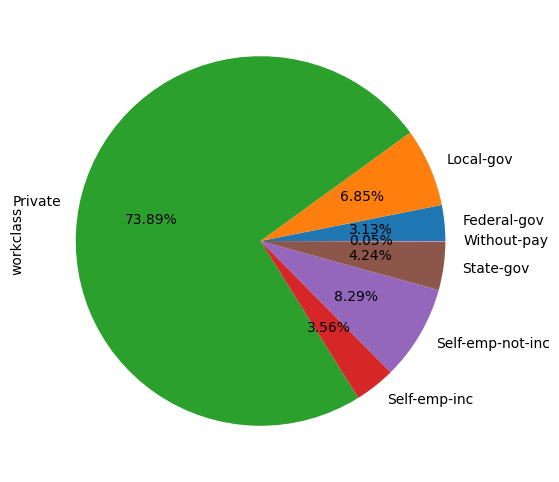

In [7]:
plt.figure(figsize=(6, 6))  # Larger figure size

df.groupby('workclass').size().plot(
    kind='pie',
    ylabel='workclass',
    autopct='%.2f%%'   # Display percentages with 2 decimal places
)

**Bar chart:**

<Axes: xlabel='workclass'>

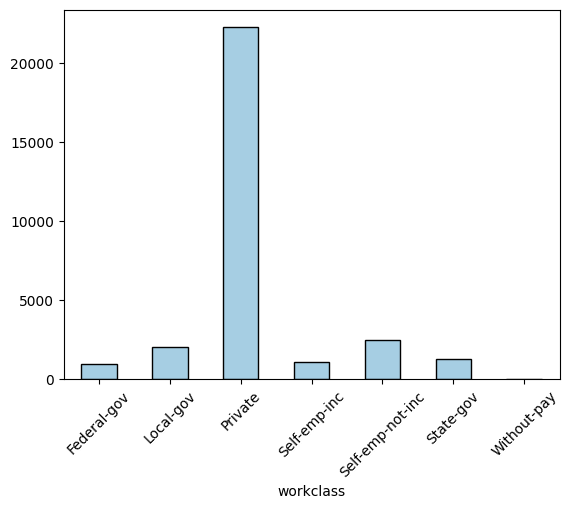

In [8]:
df.groupby('workclass').size().plot(
    kind='bar',
    rot=45,
    colormap='Paired',
    edgecolor='black',
)

**Summary:** The variable workclass represents the general employment status or type of employer associated with each individual in the dataset. According to the frequency distribution and the accompanying visualizations, the majority of individuals—approximately 74%—were employed in the private sector, likely by private companies or institutions.

Other notable categories include:

- Self-employed individuals without incorporated businesses (Self-emp-not-inc): 8.29%

- Local government employees: 6.85%

- State government employees: 4.24%

- Self-employed individuals with incorporated businesses (Self-emp-inc): 3.56%

- Federal government employees: 3.13%

A very small proportion of individuals (0.05%) were classified as unemployed.

## Q4) Examine distribution of ``education`` variable (10)
- Create a frequency distribution table for different values of ``education`` variable
- Plot pie chart for ``education`` variable
- Plot bar chart for ``education`` variable
- Provide your summary/interpretation about the distribution of ``education`` variable.

**Frequency Dsitribution table:**

In [9]:
# Create frequency distribution table, '.reset_index' converts the Series into a DataFrame
education_freq = df['education'].value_counts().reset_index()

# Renaming columns
education_freq.columns = ['education', 'Frequency']

# Calculate percentages, it creates a new column
education_freq['Percentage'] = (education_freq['Frequency'] / len(df)) * 100

# Display the table
print(education_freq)

       education  Frequency  Percentage
0        HS-grad       9840   32.623831
1   Some-college       6678   22.140442
2      Bachelors       5044   16.723029
3        Masters       1627    5.394205
4      Assoc-voc       1307    4.333267
5           11th       1048    3.474571
6     Assoc-acdm       1008    3.341953
7           10th        820    2.718653
8        7th-8th        557    1.846695
9    Prof-school        542    1.796963
10           9th        455    1.508521
11          12th        377    1.249917
12     Doctorate        375    1.243286
13       5th-6th        288    0.954844
14       1st-4th        151    0.500630
15     Preschool         45    0.149194


**Pie chart:**

<Axes: ylabel='education'>

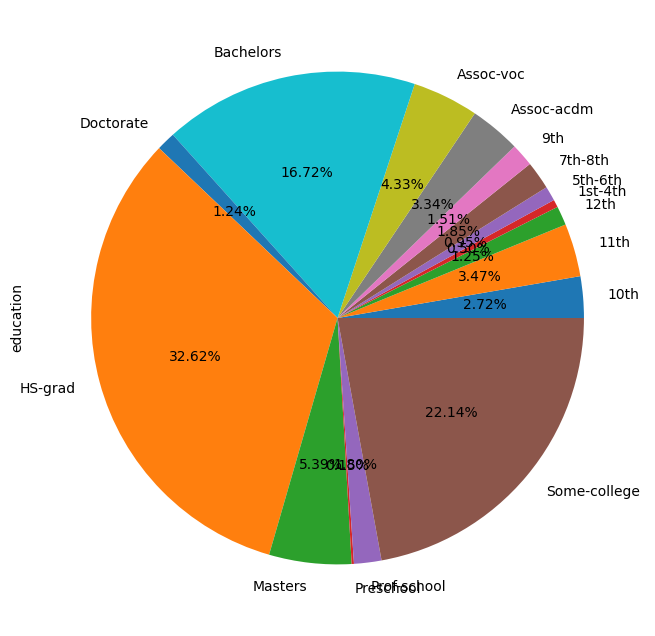

In [10]:
plt.figure(figsize=(8, 8))  # Larger figure size

df.groupby('education').size().plot(
    kind='pie',
    ylabel='education',
    autopct='%.2f%%'   # Display percentages with 2 decimal places
)

**Bar chart:**

<Axes: xlabel='education'>

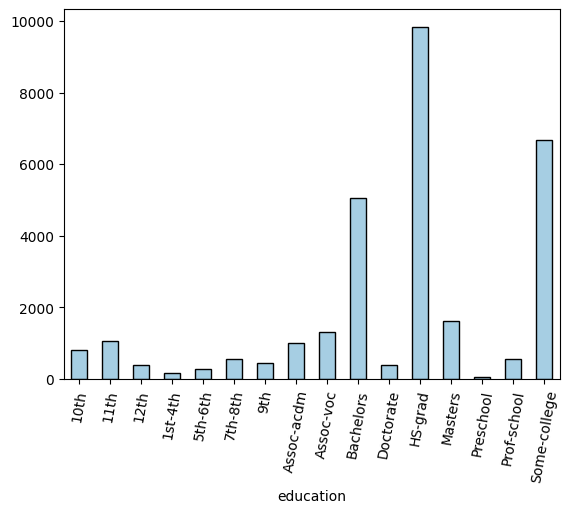

In [11]:
df.groupby('education').size().plot(
    kind='bar',
    rot=80,
    colormap='Paired',
    edgecolor='black',
)

**Summary:** The education variable reflects the highest level of education completed by individuals in the dataset. The most common education level was high school graduation (HS-grad), accounting for approximately 32.6% of the sample, followed by some college experience (22.1%) and a bachelor's degree (16.7%).

Postgraduate education levels were less common: 5.4% held a master's degree, 1.8% had a professional school degree, and 1.2% held a doctorate. Lower levels of education such as 10th grade or less represented smaller portions of the population, with preschool being the least common (0.15%).

## Q5) Examine distribution of ``marital.status`` variable (10)
- Create a frequency distribution table for different values of marital­ .status
variable
- Plot pie chart for ``marital.status`` variable
- Plot bar chart for ``marital.status`` variable
- Provide your summary/interpretation about the distribution of ``marital.status``
variable.

**Frequency Dsitribution table:**

In [12]:
# Create frequency distribution table, '.reset_index' converts the Series into a DataFrame
ms_freq = df['marital.status'].value_counts().reset_index()

# Renaming columns
ms_freq.columns = ['Marital Status', 'Frequency']

# Calculate percentages, it creates a new column
ms_freq['Percentage'] = (ms_freq['Frequency'] / len(df)) * 100

# Display the table
print(ms_freq)

          Marital Status  Frequency  Percentage
0     Married-civ-spouse      14065   46.631523
1          Never-married       9726   32.245872
2               Divorced       4214   13.971222
3              Separated        939    3.113189
4                Widowed        827    2.741861
5  Married-spouse-absent        370    1.226709
6      Married-AF-spouse         21    0.069624


**Pie chart:**

<Axes: ylabel='Marital Status'>

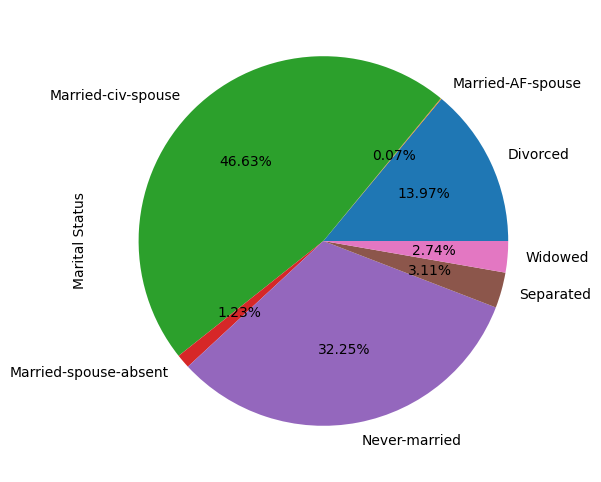

In [13]:
plt.figure(figsize=(6, 6))  # Larger figure size

df.groupby('marital.status').size().plot(
    kind='pie',
    ylabel='Marital Status',
    autopct='%.2f%%'   # Display percentages with 2 decimal places
)

**Bar chart:**

<Axes: xlabel='marital.status'>

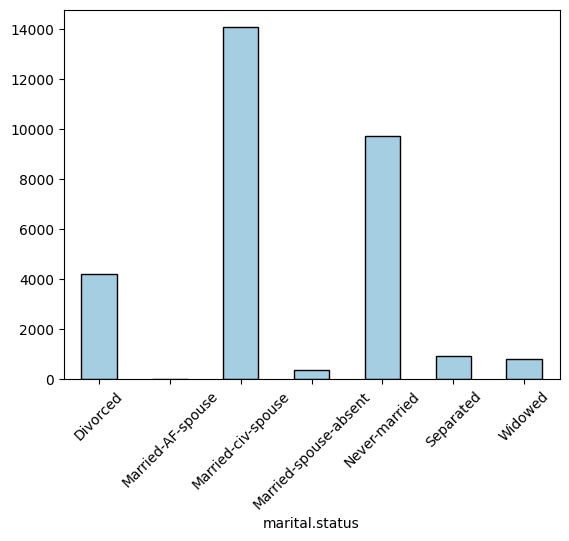

In [14]:
df.groupby('marital.status').size().plot(
    kind='bar',
    rot=45,
    colormap='Paired',
    edgecolor='black',
)

**Summary:** The marital.status variable captures the legal relationship status of individuals. Nearly half of the individuals (46.6%) were married with their spouse present (Married-civ-spouse), making it the most common category. This is followed by those who have never married, representing 32.2% of the sample.

Divorced individuals accounted for 14.0%, while smaller proportions were separated (3.1%), widowed (2.7%), or married but living apart from their spouse (1.2%). A very small group (0.07%) were married with a spouse in the Armed Forces (Married-AF-spouse).

## Q6) Examine distribution of ``occupation`` variable (10)
- Create a frequency distribution table for different values of ``occupation`` variable
- Plot pie chart for ``occupation`` variable
- Plot bar chart for ``occupation`` variable
- Provide your summary/interpretation about the distribution of ``occupation`` variable.

**Frequency Dsitribution table:**

In [15]:
# Create frequency distribution table, '.reset_index' converts the Series into a DataFrame
occupation_freq = df['occupation'].value_counts().reset_index()

# Renaming columns
occupation_freq.columns = ['occupation', 'Frequency']

# Calculate percentages, it creates a new column
occupation_freq['Percentage'] = (occupation_freq['Frequency'] / len(df)) * 100

# Display the table
print(occupation_freq)

           occupation  Frequency  Percentage
0      Prof-specialty       4038   13.387706
1        Craft-repair       4030   13.361183
2     Exec-managerial       3992   13.235197
3        Adm-clerical       3721   12.336715
4               Sales       3584   11.882501
5       Other-service       3212   10.649161
6   Machine-op-inspct       1966    6.518135
7    Transport-moving       1572    5.211856
8   Handlers-cleaners       1350    4.475831
9     Farming-fishing        989    3.278960
10       Tech-support        912    3.023672
11    Protective-serv        644    2.135137
12    Priv-house-serv        143    0.474106
13       Armed-Forces          9    0.029839


**Pie chart:**

<Axes: ylabel='Occupation'>

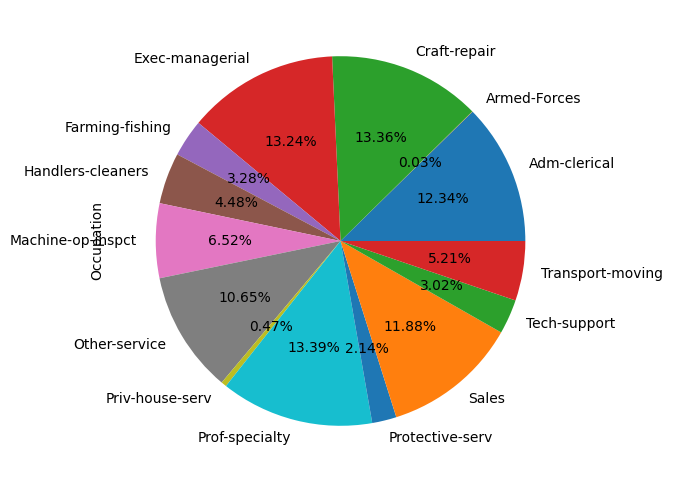

In [16]:
plt.figure(figsize=(6, 6))  # Larger figure size

df.groupby('occupation').size().plot(
    kind='pie',
    ylabel='Occupation',
    autopct='%.2f%%'   # Display percentages with 2 decimal places
)

##### Bar chart:

<Axes: xlabel='occupation'>

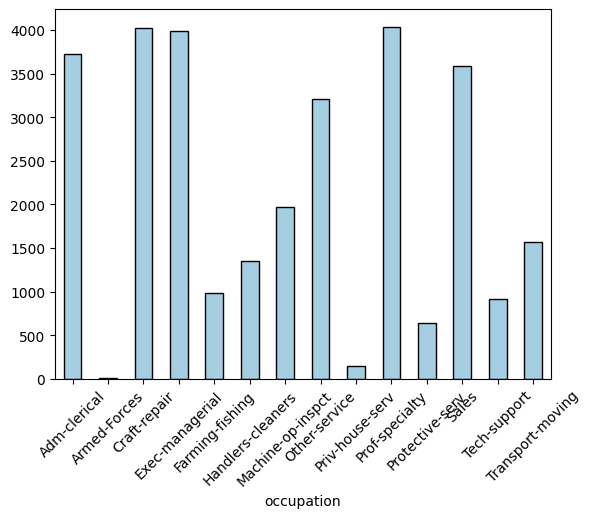

In [17]:
df.groupby('occupation').size().plot(
    kind='bar',
    rot=45,
    colormap='Paired',
    edgecolor='black',
)

**Summary:** The occupation variable describes the type of job held by individuals. The most common occupations were professional specialties (13.4%), craft and repair roles (13.4%), and executive or managerial positions (13.2%). Administrative clerical (12.3%) and sales (11.9%) also represented significant portions of the dataset.

Lower-frequency occupations included farming and fishing (3.3%), tech support (3.0%), and protective services (2.1%). The least common roles were private household services (0.47%) and Armed Forces personnel (0.03%).

This distribution suggests a workforce primarily engaged in skilled professional, technical, and administrative jobs, with fewer individuals in military or domestic roles.

## Q7) Examine distribution of ``sex`` variable (10)
- Create a frequency distribution table for different values of ``sex`` variable
- Plot pie chart for ``sex`` variable
- Plot bar chart for ``sex`` variable
- Provide your summary/interpretation about the distribution of ``sex`` variable.

**Frequency Dsitribution table:**

In [18]:
# Create frequency distribution table, '.reset_index' converts the Series into a DataFrame
sex_freq = df['sex'].value_counts().reset_index()

# Renaming columns
sex_freq.columns = ['sex', 'Frequency']

# Calculate percentages, it creates a new column
sex_freq['Percentage'] = (sex_freq['Frequency'] / len(df)) * 100

# Display the table
print(sex_freq)

      sex  Frequency  Percentage
0    Male      20380   67.568464
1  Female       9782   32.431536


**Pie chart:**

<Axes: ylabel='Sex'>

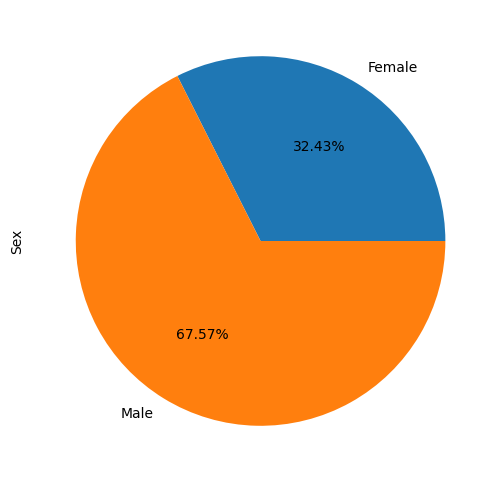

In [19]:
plt.figure(figsize=(6, 6))  # Larger figure size

df.groupby('sex').size().plot(
    kind='pie',
    ylabel='Sex',
    autopct='%.2f%%'   # Display percentages with 2 decimal places
)

**Bar chart:**

<Axes: xlabel='sex'>

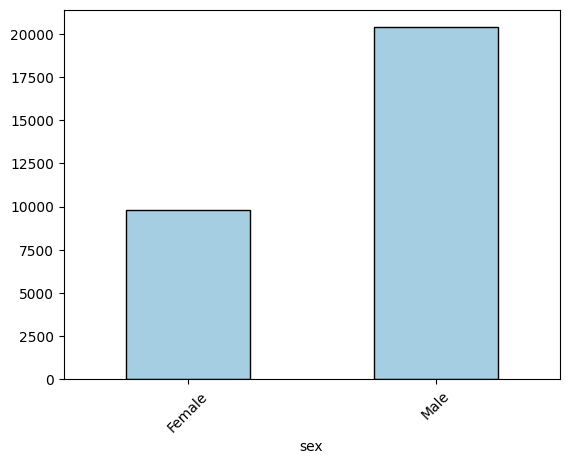

In [20]:
df.groupby('sex').size().plot(
    kind='bar',
    rot=45,
    colormap='Paired',
    edgecolor='black',
)

**Summary:** The sex variable indicates the gender of individuals in the dataset. The distribution is noticeably imbalanced, with males comprising approximately 67.6% of the sample and females making up the remaining 32.4%.

This suggests that the dataset is male-dominated, which may reflect the workforce demographics captured in the census or potential sampling biases.

# Questions about examining distribution of one quantitative variable

## Q8) Examine distribution of ``age`` variable (10)
- Plot histogram for ``age`` variable
- Interpret your observation from the histogram with respect to the shape,
center, spread, and outliers.
- Calculate measures of center of the distribution of ``age``: mode, mean, median
- Calculate measures of spread of the distribution of ``age``: range, IQR, outliers based on 1.5IQR criterion, standard deviation.
- Plot the box plot for ``age`` variable
- Provide your summary/interpretation about the distribution of ``age``.

**Histogram:**

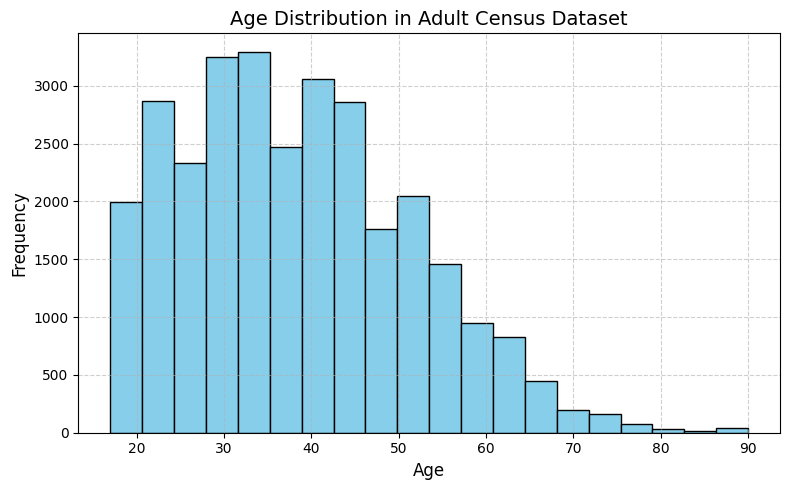

In [21]:
# Create histogram for the 'age' variable
plt.figure(figsize=(8, 5))  # Set figure size
df['age'].hist(bins=20, color='skyblue', edgecolor='black')  # Histogram with styling

# Add title and axis labels
plt.title('Age Distribution in Adult Census Dataset', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

**Observation:** The shape of the distribution is right-skewed (positive values). Regarding the center, the highest frequencies occur around  ages 25-45 (approximately), possibly the mean and median lies within this range. For the spread, the distribution has a wide spread (ages range from 17 to 90). Finally, there appear to be outliers above age 75, but this must be determaned with boxplot or calculating the IQR.

**Mode, Mean, and Median:**

In [22]:
# Mode: most frequent age(s)
age_mode = df['age'].mode()
print(f"Mode(s) of age: {list(age_mode.values)}")

# Mean: average age
age_mean = df['age'].mean()
print(f"Mean age: {age_mean:.2f}")

# Median: middle age
age_median = df['age'].median()
print(f"Median age: {age_median}")

Mode(s) of age: [np.int64(36)]
Mean age: 38.44
Median age: 37.0


**Range, IQR, outliers based on 1.5IQR criterion, standard deviation:**

In [23]:
# Range
age_min = df['age'].min()
age_max = df['age'].max()
age_range = age_max - age_min
print(f"Range of age: {age_range} (from {age_min} to {age_max})")

# IQR (Interquartile Range)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR (Q3 - Q1): {IQR} (Q1 = {Q1}, Q3 = {Q3})")

# Outliers based on 1.5-IQR criterion
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df.age < lower_bound) | (df.age > upper_bound)]['age']
print(f"Number of outliers: {age_outliers.shape[0]}")
print(f"Outlier threshold: below {lower_bound} or above {upper_bound}")

# Standard Deviation
age_std = df['age'].std()
print(f"Standard deviation of age: {age_std:.2f}")

Range of age: 73 (from 17 to 90)
IQR (Q3 - Q1): 19.0 (Q1 = 28.0, Q3 = 47.0)
Number of outliers: 169
Outlier threshold: below -0.5 or above 75.5
Standard deviation of age: 13.13


**Box plot:**

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_27920/160025984.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0, 0.5, 'Age')

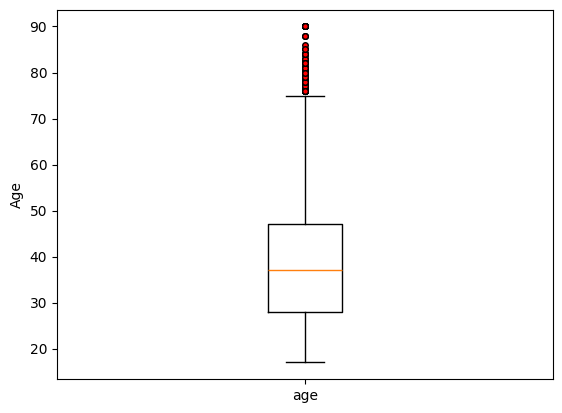

In [24]:
plt.boxplot(
    x=df['age'],
    labels=['age'],
    flierprops=dict(   # Argument to reduce and
        marker='o',    # make more visible the outliers.
        markersize=4,
        linestyle='none',
        markerfacecolor='red'
    )
)
plt.ylabel('Age')

**Summary:** The age distribution shows a right-skewed pattern, with the highest frequencies occurring between the ages of 20 and 50, peaking around 28-35 years. The mean age is 38.44, and the median age is 37.0, this indicates a slightly right-skewed distribution beacause the mean is slightly higher than the median. The mode is 36, reflecting the most common age group. The range of ages spans from 17 to 90, with an interquartile range (IQR) of 19.0 (Q1 = 28.0, Q3 = 47.0), suggesting moderate variability in the middle 50% of the data.

The presence of 169 outliers, defined as ages below -0.5 or above 75.5, indicates a long tail of older individuals, with some data points extending into the 80s and 90s; since age cannot be negative (and the dataset's minimum age is 17), the lower bound of -0.5 is effectively irrelevant for this dataset because no values can fall below it. The standard deviation of 13.13 further supports the spread of ages around the mean, with most data clustering within a reasonable range but with notable outliers at the higher end. Overall, the distribution suggests a population dominated by working-age adults, with a gradual decline in frequency as age increases beyond 50.

## Q9) Examine distribution of ``education.num`` variable (10)
- Plot histogram for ``education.num`` variable
- Interpret your observation from the histogram with respect to the shape, center, spread, and outliers.
- Calculate measures of center of the distribution of ``education.num``: mode, mean, median
- Calculate measures of spread of the distribution of ``education.num``: range, IQR, outliers based on 1.5IQR criterion, standard deviation.
- Plot the box plot for ``education.num`` variable
- Provide your summary/interpretation about the distribution of ``education.num``.

**Histogram:**

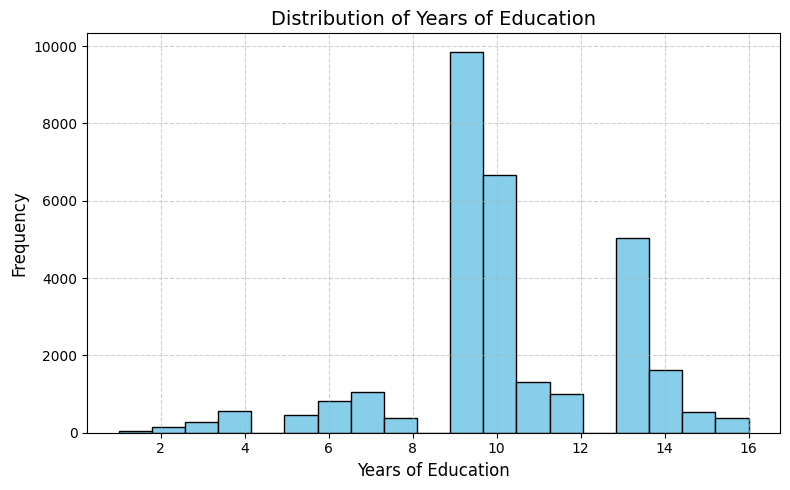

In [36]:
# Create histogram for the 'age' variable
plt.figure(figsize=(8, 5))  # Set figure size
df['education.num'].hist(bins=19, color='skyblue', edgecolor='black')  # Histogram with styling

# Add title and axis labels
plt.title('Distribution of Years of Education', fontsize=14)
plt.xlabel('Years of Education', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

**Observation:** The distribution exhibits a right-skewed shape (however, it seems to be left-skewed). The central tendency appears to peak around 9 to 11 years of education, suggesting that the mean and median likely fall within this interval. The spread of the data is broad, ranging from 1 to 16 years of education. Potential outliers may exist below 3 years of education, which would require confirmation through a boxplot or IQR calculation.

**Mode, Mean, and Median:**

In [26]:
# Mode: Most frequently occurring value(s) of years of education
education_mode = df['education.num'].mode()
print(f"Mode(s) of education.num: {list(education_mode.values)}")

# Mean: Average number of years of education
education_mean = df['education.num'].mean()
print(f"Mean of education.num: {education_mean:.2f}")

# Median: Middle value of years of education when sorted
education_median = df['education.num'].median()
print(f"Median of education.num: {education_median}")

Mode(s) of education.num: [np.int64(9)]
Mean of education.num: 10.12
Median of education.num: 10.0


**Range, IQR, outliers based on 1.5IQR criterion, standard deviation:**

In [27]:
# Range
education_min = df['education.num'].min()
education_max = df['education.num'].max()
education_range = education_max - education_min
print(f"Range of education.num: {education_range} (from {education_min} to {education_max})")

# Calculate IQR
q1 = df['education.num'].quantile(0.25)
q3 = df['education.num'].quantile(0.75)
iqr = q3 - q1
print(f"IQR (Q3 - Q1): {iqr} (Q1 = {q1}, Q3 = {q3})")

# Detect outliers based on 1.5 * IQR criterion
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
education_outliers = df[(df['education.num'] < lower_bound) |
    (df['education.num'] > upper_bound)]['education.num']

print(f"Number of outliers: {education_outliers.shape[0]}")
print(f"Outlier thresholds: below {lower_bound} or above {upper_bound}")

# Calculate Standard Deviation
education_std = df['education.num'].std()
print(f"Standard deviation of education.num: {education_std:.2f}")

Range of education.num: 15 (from 1 to 16)
IQR (Q3 - Q1): 4.0 (Q1 = 9.0, Q3 = 13.0)
Number of outliers: 196
Outlier thresholds: below 3.0 or above 19.0
Standard deviation of education.num: 2.55


**Box plot:**

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_27920/3999116623.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0.5, 1.0, 'Boxplot of Years of Education (education.num)')

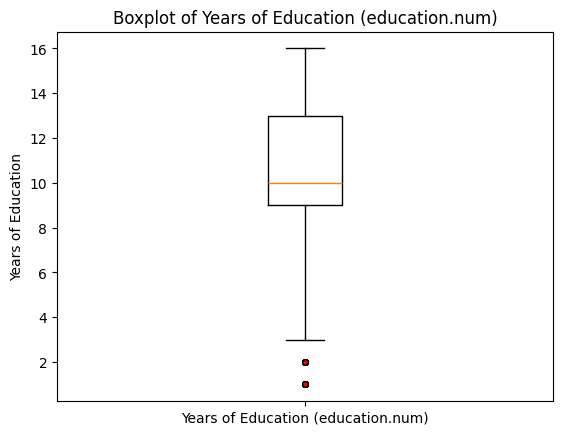

In [28]:
plt.boxplot(
    x=df['education.num'],
    labels=['Years of Education (education.num)'],
    flierprops=dict(   # Argument to reduce and
        marker='o',    # make more visible the outliers.
        markersize=4,
        linestyle='none',
        markerfacecolor='red'
    )
)
# Add y-axis label
plt.ylabel('Years of Education')

# Add a title for clarity
plt.title('Boxplot of Years of Education (education.num)')

**Summary:** The distribution of years of education (education.num) is right-skewed, with the highest frequency occurring at 9 years, which aligns with the mode. The mean (10.12) and median (10.0) are closely aligned, indicating a relatively symmetric central tendency around 9-10 years. The spread ranges from 1 to 16 years, with an interquartile range (IQR) of 4.0 (Q1 = 9.0, Q3 = 13.0), reflecting moderate variability. The presence of 196 outliers, defined as values below 3.0 or above 19.0, suggests a long tail, particularly at the lower end, as confirmed by the histogram's gradual decline below 9 years and the boxplot's indication of outliers around 2 years. The standard deviation of 2.55 further supports a concentrated distribution with some extreme values.

## Q10) Examine distribution of ``hours.per.week`` variable (10)
- Plot histogram for ``hours.per.week`` variable
- Interpret your observation from the histogram with respect to the shape, center, spread, and outliers.
- Calculate measures of center of the distribution of ``hours.per.week``: mode, mean, median
- Calculate measures of spread of the distribution of ``hours.per.week``: range, IQR, outliers based on 1.5IQR criterion, standard deviation.
- Plot the box plot for ``hours.per.week`` variable
- Provide your summary/interpretation about the distribution of ``hours.per.week``.

**Histogram:**

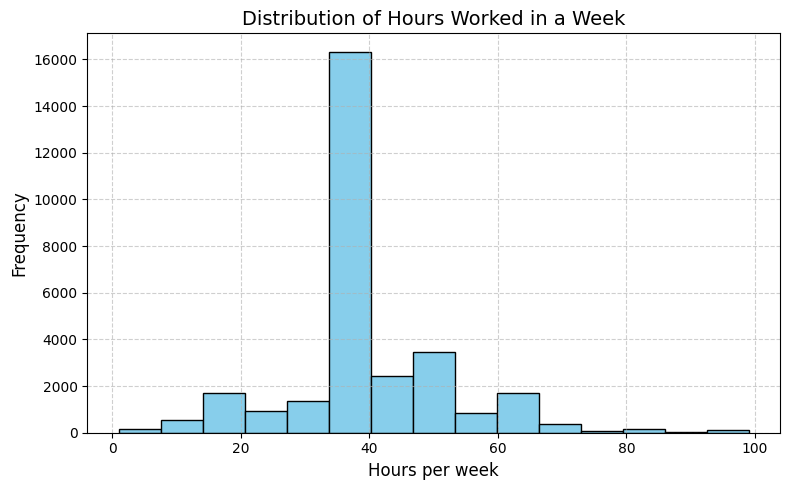

In [29]:
# Create histogram for the 'age' variable
plt.figure(figsize=(8, 5))  # Set figure size
df['hours.per.week'].hist(bins=15, color='skyblue', edgecolor='black')  # Histogram with styling

# Add title and axis labels
plt.title('Distribution of Hours Worked in a Week', fontsize=14)
plt.xlabel('Hours per week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

**Observation:** The histogram of hours worked per week shows a right-skewed distribution, with a prominent peak at around 40 hours per week. The center, likely around the 40-hour mark, reflects a typical full-time work schedule. The spread ranges from just above 0 to 100 hours, showing a wide variation in weekly work hours. The right skew suggests a long tail, with some individuals working significantly more than 40 hours, up to 100 hours, which could indicate potential outliers. There are also smaller peaks at lower hours (e.g., around 20-30 hours), possibly representing part-time workers. Outliers are likely present above 60-70 hours, where frequencies become sparse, but this would need confirmation with a boxplot or IQR calculation.

**Mode, Mean, and Median:**

In [30]:
# Mode: Most frequently occurring value(s) of worked hours in a week
hpw_mode = df['hours.per.week'].mode()
print(f"Mode(s) of hours.per.week: {list(hpw_mode.values)}")

# Mean: Average number of hours per week
hpw_mean = df['hours.per.week'].mean()
print(f"Mean of hours.per.week: {hpw_mean:.2f}")

# Median: Middle value of hours per week when sorted
hpw_median = df['hours.per.week'].median()
print(f"Median of hours.per.week: {hpw_median}")

Mode(s) of hours.per.week: [np.int64(40)]
Mean of hours.per.week: 40.93
Median of hours.per.week: 40.0


**Range, IQR, outliers based on 1.5IQR criterion, standard deviation:**

In [31]:
# Range
hpw_min = df['hours.per.week'].min()
hpw_max = df['hours.per.week'].max()
hpw_range = hpw_max - hpw_min
print(f"Range of hours.per.week: {hpw_range} (from {hpw_min} to {hpw_max})")

# Calculate IQR
q1 = df['hours.per.week'].quantile(0.25)
q3 = df['hours.per.week'].quantile(0.75)
iqr = q3 - q1
print(f"IQR (Q3 - Q1): {iqr} (Q1 = {q1}, Q3 = {q3})")

# Detect outliers based on 1.5 * IQR criterion
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
hpw_outliers = df[(df['hours.per.week'] < lower_bound) |
    (df['hours.per.week'] > upper_bound)]['hours.per.week']

print(f"Number of outliers: {hpw_outliers.shape[0]}")
print(f"Outlier thresholds: below {lower_bound} or above {upper_bound}")

# Calculate Standard Deviation
hpw_std = df['hours.per.week'].std()
print(f"Standard deviation of hours.per.week: {hpw_std:.2f}")

Range of hours.per.week: 98 (from 1 to 99)
IQR (Q3 - Q1): 5.0 (Q1 = 40.0, Q3 = 45.0)
Number of outliers: 7953
Outlier thresholds: below 32.5 or above 52.5
Standard deviation of hours.per.week: 11.98


**Box plot:**

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_27920/758457054.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0.5, 1.0, 'Boxplot of Hours Worked per Week (hours.per.week)')

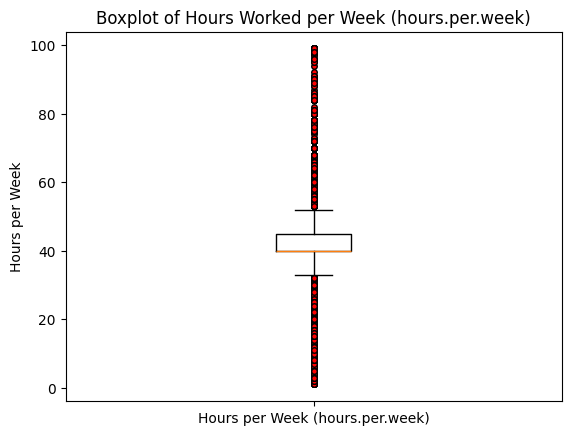

In [32]:
plt.boxplot(
    x=[df['hours.per.week']],  
    labels=['Hours per Week (hours.per.week)'],  
    flierprops=dict(   
        marker='o',
        markersize=4,
        linestyle='none',
        markerfacecolor='red'
    )
)

# Add y-axis label
plt.ylabel('Hours per Week')

# Add a title for clarity
plt.title('Boxplot of Hours Worked per Week (hours.per.week)')

**Summary:** The distribution of hours worked per week (hours.per.week) is approximately symmetric with a slight right skew, centered around 40 hours, which aligns with the mode, median (40.0), and a mean (40.93) close to the typical full-time workweek. The spread ranges from 1 to 99 hours, with an interquartile range (IQR) of 5.0 (Q1 = 40.0, Q3 = 45.0), indicating that the middle 50% of the data is tightly clustered around the central value. The presence of 7,953 outliers, defined as values below 32.5 or above 52.5, suggests significant variability, with a long tail of individuals working fewer or many more hours than the norm. The standard deviation of 11.98 further supports this wide dispersion, highlighting a substantial number of atypical work hours, particularly at the extremes.

The boxplot reveals a compact interquartile range (IQR) from 40 to 45 hours, indicating that 50% of the data is tightly clustered around the median of 40 hours.